Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


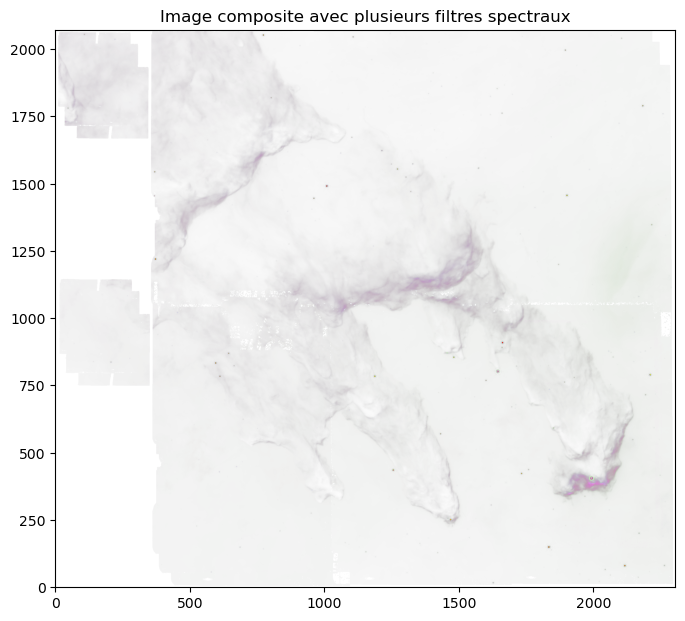

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from skimage.transform import resize  # Utiliser skimage pour la fonction resize

# Liste des fichiers FITS pour chaque filtre spectral
fichiers_fits = ['MAST_2023-11-10T04301/JWST/jw02739-o002_t001_miri_f1130w/jw02739-o002_t001_miri_f1130w_i2d.fits',
                'MAST_2023-11-10T04301/JWST/jw02739-o002_t001_miri_f1500w/jw02739-o002_t001_miri_f1500w_i2d.fits',
                'MAST_2023-11-10T04302/JWST/jw02739-o002_t001_miri_f770w/jw02739-o002_t001_miri_f770w_i2d.fits',
                'MAST_2023-11-10T04302/JWST/jw02739-o002_t001_miri_f1130w/jw02739-o002_t001_miri_f1130w_i2d.fits']

# Définir les couleurs RVB pour chaque filtre
couleurs_filtres = [
    'magma',  # Couleur pour le filtre F444W
    'magma',   # Couleur pour le filtre 1
    'cubehelix',  # Couleur pour le filtre 2
    # Ajoute les couleurs pour d'autres filtres au besoin
]

# Fonction pour charger les données d'un fichier FITS, normaliser les valeurs et redimensionner
def charger_image(nom_fichier):
    hdul = fits.open(nom_fichier)
    data = hdul[1].data

    # Masquer les valeurs invalides (NaN)
    masked_data = np.ma.masked_invalid(data)

    # Normaliser les données
    vmin, vmax = np.percentile(masked_data, 1), np.percentile(masked_data, 99)
    normalized_data = (masked_data - vmin) / (vmax - vmin)

    hdul.close()
    return normalized_data

# Charger les images pour chaque filtre et obtenir les dimensions communes
images_filtres = [charger_image(fichier) for fichier in fichiers_fits]
dimensions_communes = images_filtres[0].shape

# Redimensionner toutes les images pour qu'elles aient les mêmes dimensions que la première
images_filtres_resized = [resize(image, dimensions_communes, mode='constant', anti_aliasing=True) for image in images_filtres]

# Créer une image RVB composite
rgb_image = np.stack([image_filtre for image_filtre in images_filtres_resized], axis=-1)

# Normaliser l'image composite entre 0 et 1
rgb_image /= len(images_filtres)

# Afficher l'image composite
plt.figure(figsize=(8, 8))
plt.imshow(rgb_image, origin='lower')
plt.title('Image composite avec plusieurs filtres spectraux')
plt.show()


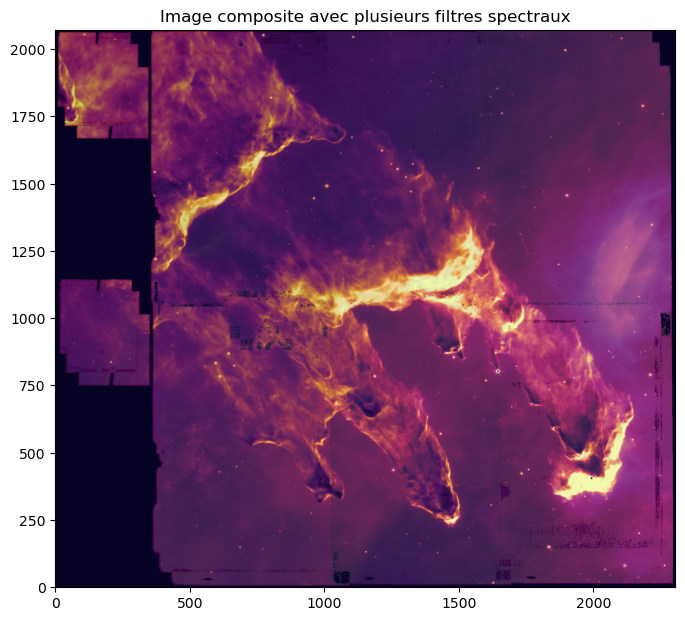

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from skimage.transform import resize

# Liste des fichiers FITS pour chaque filtre spectral
fichiers_fits = [
    'MAST_2023-11-10T04301/JWST/jw02739-o002_t001_miri_f1130w/jw02739-o002_t001_miri_f1130w_i2d.fits',
    'MAST_2023-11-10T04301/JWST/jw02739-o002_t001_miri_f1500w/jw02739-o002_t001_miri_f1500w_i2d.fits',
    'MAST_2023-11-10T04302/JWST/jw02739-o002_t001_miri_f770w/jw02739-o002_t001_miri_f770w_i2d.fits',
    'MAST_2023-11-10T04302/JWST/jw02739-o002_t001_miri_f1130w/jw02739-o002_t001_miri_f1130w_i2d.fits'
]

# Définir les couleurs RVB et les alpha pour chaque filtre
couleurs_filtres = [
    ('hot', 0.5),
    ('cubehelix', 0.7),
    ('plasma', 0.7),
    ("magma", 0.7)
]

def getRender():
    # Fonction pour charger les données d'un fichier FITS, normaliser les valeurs et redimensionner
    def charger_image(nom_fichier):
        hdul = fits.open(nom_fichier)
        data = hdul[1].data

        # Masquer les valeurs invalides (NaN)
        masked_data = np.ma.masked_invalid(data)

        # Normaliser les données
        vmin, vmax = np.percentile(masked_data, 1), np.percentile(masked_data, 99)
        normalized_data = (masked_data - vmin) / (vmax - vmin)

        hdul.close()
        return normalized_data

    # Charger les images pour chaque filtre et obtenir les dimensions communes
    images_filtres = [charger_image(fichier) for fichier in fichiers_fits]
    dimensions_communes = images_filtres[0].shape

    # Redimensionner toutes les images pour qu'elles aient les mêmes dimensions que la première
    images_filtres_resized = [resize(image, dimensions_communes, mode='constant', anti_aliasing=True) for image in images_filtres]

    # Créer une image RVB composite
    rgb_image = np.zeros(dimensions_communes + (3,))  # Initialiser une image RGB vide

    for i, (image_filtre, (cmap, alpha)) in enumerate(zip(images_filtres_resized, couleurs_filtres)):
        rgb_image += plt.get_cmap(cmap)(image_filtre)[:, :, :3] * alpha

    # Normaliser l'image composite entre 0 et 1
    rgb_image /= len(images_filtres)

    #Aumenter la luminosité
    brightness_scale = 1.5
    rgb_image *= brightness_scale

    return rgb_image
getRender()